<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Lab8/Task2_transfer_learning_FT_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/data"))
file_count = len(files)
print(file_count)

['cats', 'dogs', 'horses', 'humans']
0


In [4]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/data_divided'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
# Reorginize the images into folders of Train, Validation, Test
import shutil
# Humans
for i in range(1,102):
    src = os.path.join(original_dataset_dir + "/Humans", 'rider-{}.jpg'.format(i))
    dst = os.path.join(train_dir, 'rider.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(102,151):
    src = os.path.join(original_dataset_dir + "/Humans", 'rider-{}.jpg'.format(i))
    dst = os.path.join(validation_dir, 'rider.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(151, 203):
    src = os.path.join(original_dataset_dir + "/Humans", 'rider-{}.jpg'.format(i))
    dst = os.path.join(test_dir, 'rider.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

# Cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1,102)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/cats", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(102,151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/cats", fname)
    dst = os.path.join(validation_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(151,203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/cats", fname)
    dst = os.path.join(test_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

# Dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1,102)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/dogs", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(102,151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/dogs", fname)
    dst = os.path.join(validation_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(151,203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + "/dogs", fname)
    dst = os.path.join(test_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

# Horses
for i in range(1,102):
    src = os.path.join(original_dataset_dir + "/horses", 'horse-{}.jpg'.format(i))
    dst = os.path.join(train_dir, 'horse.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(102,151):
    src = os.path.join(original_dataset_dir + "/horses", 'horse-{}.jpg'.format(i))
    dst = os.path.join(validation_dir, 'horse.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(151,203):
    src = os.path.join(original_dataset_dir + "/horses", 'horse-{}.jpg'.format(i))
    dst = os.path.join(test_dir, 'horse.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

In [7]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 299
LR = 1e-4

In [8]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0
    elif word_label == 'horse': return 2
    elif word_label == 'rider': return 3

In [9]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [10]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [ ]:
test_y.shape

(208,)

**Model Preparation**

In [17]:
## Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten,SeparableConv2D,BatchNormalization,Activation,GlobalAveragePooling2D 
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [18]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


model.summary()


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [37]:
num_classes = 4
last_layer = model.get_layer('block14_sepconv1_act').output

x= SeparableConv2D(2048, (3, 3) ,name='block14_sepconv2',padding="same",use_bias=False)(last_layer) #listo
x= BatchNormalization(name='block14_sepconv2_bn')(x)#listo
x = Activation (activation='relu', name='block14_sepconv2_act')(x)#listo
x = GlobalAveragePooling2D (name='avg_pool')(x)#listo


out = Dense(num_classes, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-5]:
	layer.trainable = False

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [34]:
layer_output = model.get_layer('avg_pool').output
layer_output

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [35]:
model.get_layer('avg_pool').get_config()

{'data_format': 'channels_last',
 'dtype': 'float32',
 'name': 'avg_pool',
 'trainable': True}

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [40]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks
                    )

Epoch 1/10
41/41 [==============================] - 41s 147ms/step - loss: 0.5475 - acc: 0.8011 - val_loss: 0.9370 - val_acc: 1.0000
Epoch 2/10
41/41 [==============================] - 5s 111ms/step - loss: 0.0241 - acc: 0.9989 - val_loss: 0.7555 - val_acc: 0.9949
Epoch 3/10
41/41 [==============================] - 5s 113ms/step - loss: 0.0270 - acc: 0.9871 - val_loss: 0.6083 - val_acc: 0.9847
Epoch 4/10
41/41 [==============================] - 5s 113ms/step - loss: 0.0176 - acc: 0.9866 - val_loss: 0.4407 - val_acc: 0.9949
Epoch 5/10
41/41 [==============================] - 5s 113ms/step - loss: 0.1173 - acc: 0.9767 - val_loss: 0.3788 - val_acc: 0.9847
Epoch 6/10
41/41 [==============================] - 5s 114ms/step - loss: 0.0154 - acc: 0.9958 - val_loss: 0.2648 - val_acc: 0.9847
Epoch 7/10
41/41 [==============================] - 5s 115ms/step - loss: 0.0068 - acc: 0.9949 - val_loss: 0.1809 - val_acc: 0.9898
Epoch 8/10
41/41 [==============================] - 5s 114ms/step - loss: 0

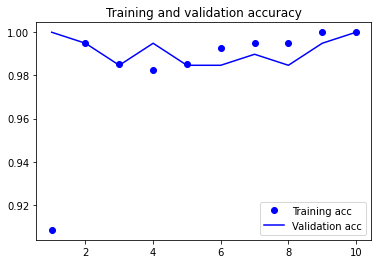

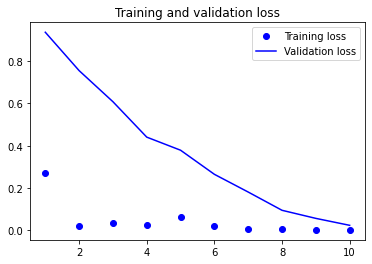

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:

from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions,axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average= 'weighted' )

auc = roc_auc_score(test_y, predictions ,multi_class='ovr')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 1.0
Val Accuracy:	 1.0
Test Accuracy:	 0.9855769230769231
Precision:	 0.9856640769515354
Recall:		 0.9855769230769231
F1 Score:	 0.9855755894590845
AUC:		 0.999599358974359
